## Introduction: Explainability

In the previous notebooks of this project, we explored the Titanic dataset: a widely used benchmark from a popular Kaggle competition, to understand the factors associated with passenger survival.

We performed extensive feature engineering, evaluated multiple measures of feature importance (Random Forest importance, Permutation Importance, LASSO), and trained three baseline models. Among these, the Gradient Boosting Classifier achieved the highest accuracy and was selected as the model for further analysis.

In this notebook, we shift our focus to model explainability. Using SHAP (SHapley Additive exPlanations), a widely adopted explainability technique, we aim to understand how the trained model makes its predictions, and which features contribute most to estimating survival probability.

It is important to note that this dataset consists of observational data, not data generated from controlled experiments. Therefore, the explanations derived here should be interpreted as associations that help us understand the model’s behaviour, not as causal claims about what truly determines survivability. Our goal is to make sense of the model’s decision-making process and highlight patterns learned from the data.

In [11]:
from joblib import load
from sklearn.model_selection import train_test_split

# Load dataset
%store -r df

# Split dataset

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load model
model = load('gb.joblib')

We first examine the TreeExplainer SHAP values. It appears that Sex (being male) strongly pushes predictions toward non-survival, while Pclass shows that higher class (lower numeric value) increases survival, meaning lower classes are less likely to survive. Fare generally has a positive effect, so passengers who paid more had a higher predicted chance of survival. Age shows the opposite trend: younger passengers are more likely to survive, reflecting the historical “women and children first” policy. Overall, these patterns align with expectations based on social norms, class, and ticket price during the Titanic disaster.

'CabinLetter_U' appears as a strong feature in the SHAP plot, but in this dataset it simply encodes missing/unknown cabin information. Because it doesn’t represent a meaningful physical location, its effect on survival predictions is likely an artifact of missing data rather than a real causal factor. For interpretability, we can focus on the other cabin letters or features with concrete meaning.

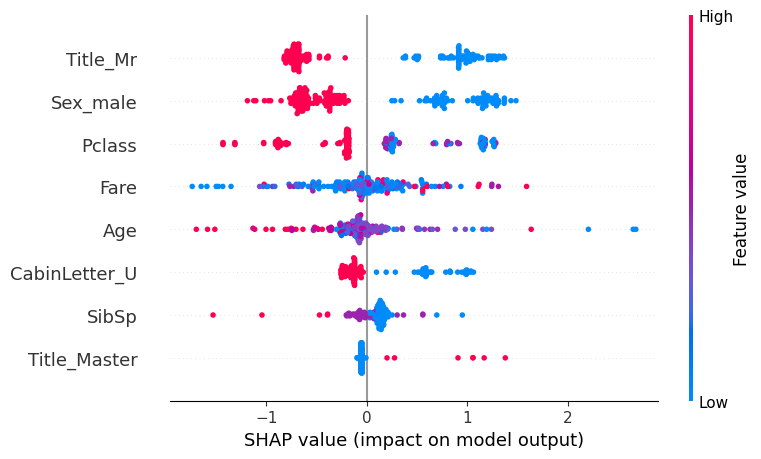

In [ ]:
# Apply SHAP
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


The baseline model predicts survival with an initial probability of 0.81. Features that increase the predicted chance of survival include being a Master, not being Mr, having a small number of siblings/spouses, and a higher fare (e.g., 15.25). Features that decrease survival probability include being male, belonging to a lower passenger class, and having an unknown cabin (CabinLetter_U), which we consider an artifact of missing data rather than a meaningful factor.

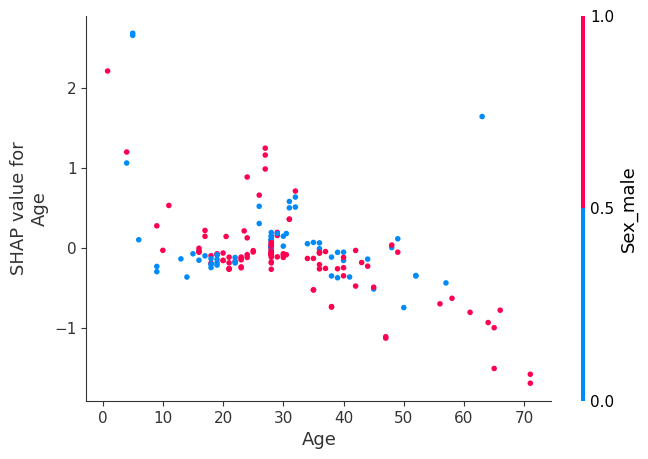

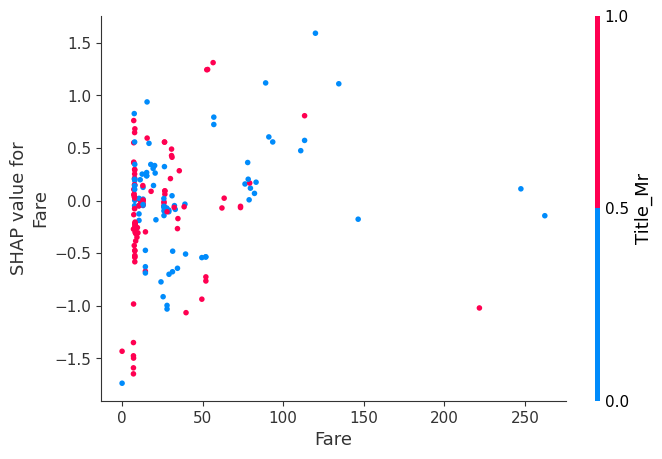

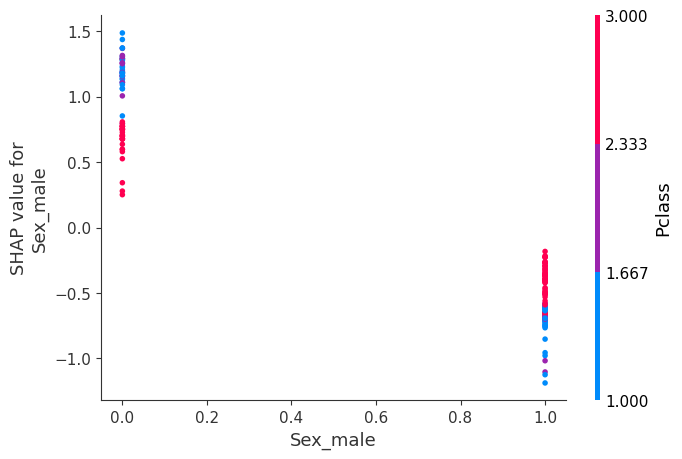

In [12]:
shap.dependence_plot("Age", shap_values, X_test)
shap.dependence_plot("Fare", shap_values, X_test)
shap.dependence_plot("Sex_male", shap_values, X_test)
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[0,:], 
                X_test.iloc[0,:])